## Becoming an Independent Data Scientist
----

This assignment required to identify at least two publicly accessible datasets that are consistent across a meaningful dimension. I had to state a research question that can be answered using these datasets and then create a visual using matplotlib that addresses the stated research question. I also had to justify how the visual addresses my research question.

I had to incorporate and defend the Cairo’s principles of truth, beauty, function, and insight.

### Region and the domain category of the dataset
* Region: Singapore 
* Description: 'No. of  Sales, Resale and Refinancing applications with Bank Loans by
  Fiscal Year

### Research question
* How the number of loan applications related to number of loans sanctioned by bank from year 2006-15?


<IPython.core.display.Javascript object>


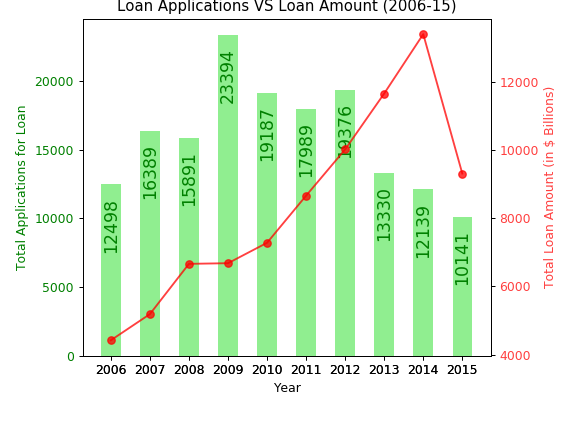

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib notebook

df1 = pd.read_csv('bank_loan.csv')
df2 = pd.read_csv('total_loan_short.csv')
df2 = df2[['month', 'total_loans']]

times = pd.DatetimeIndex(df2['month'])
loans, applications, year = [], [], []

for i in df2.groupby(by = times.year):
    loans.append(np.sum(i[1]['total_loans']) / 1000)
    
for i in df1.groupby(by = 'financial_year'):
    year.append(i[0])
    applications.append(np.sum(i[1]['no_of_applications']))
    
fig = plt.figure()
ax1 = fig.add_subplot(111)
bars = plt.bar(year, applications, align='center', linewidth=0, width = 0.5, color='lightgreen')
plt.xticks(year)
plt.xlabel('Year')
plt.yticks(color = 'green')
plt.ylabel('Total Applications for Loan', color = 'green')

for bar in bars:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 2000, str(int(height)) , ha='center', 
                   color='green', fontsize=14, rotation = 'vertical')

ax2 = fig.add_subplot(111, sharex=ax1, frameon=False)
ax2.plot(year, loans[2:], '-o', color = 'r', alpha = 0.75)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.yticks(color = 'r', alpha = 0.75)
plt.ylabel("Total Loan Amount (in $ Billions)", color = 'r', alpha = 0.75)
plt.tight_layout()
plt.title('Loan Applications VS Loan Amount (2006-15)')